In [213]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix

In [214]:
df=pd.read_csv("framingham.csv")

In [215]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [216]:
df.shape

(4240, 16)

In [217]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [218]:
df.keys()

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [220]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

It contains null values 

In [221]:
df.dropna(axis=0,inplace=True)
df.shape

(3658, 16)

In [222]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x25a9e38e0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25a9e36ded0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a9e38d090>],
 'medians': [<matplotlib.lines.Line2D at 0x25a9e356f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a9e354190>],
 'means': []}

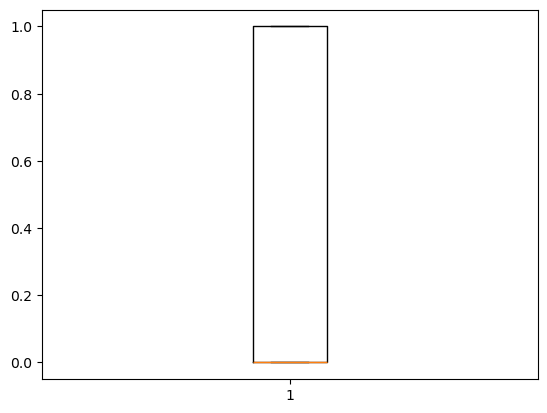

In [223]:
plt.boxplot(df.male)

{'whiskers': [<matplotlib.lines.Line2D at 0x25a9d1103d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25a9d0fdbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a9d3e81d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25a9e3041d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a9e304a90>],
 'means': []}

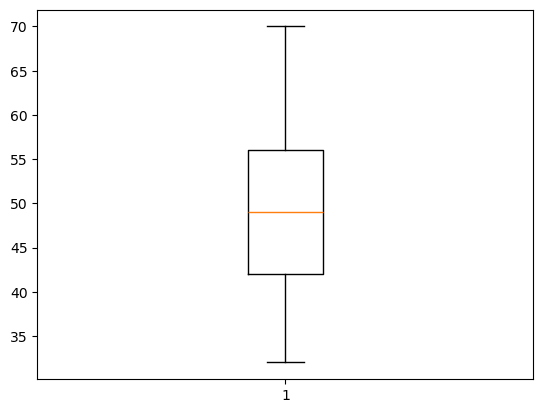

In [224]:
plt.boxplot(df.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x25a9e526290>,
 'caps': [<matplotlib.lines.Line2D at 0x25a9e527590>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a9e525a90>],
 'medians': [<matplotlib.lines.Line2D at 0x25a9e5341d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a9e534b10>],
 'means': []}

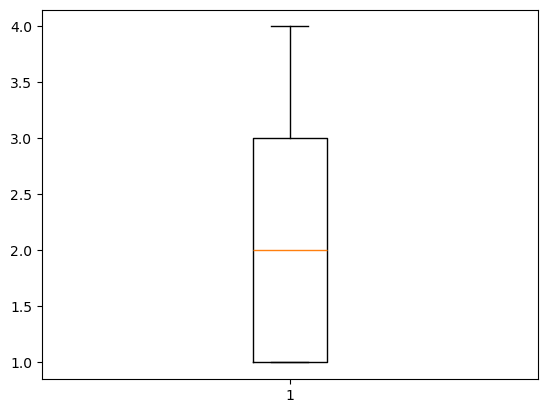

In [225]:
 plt.boxplot(df.education)

{'whiskers': [<matplotlib.lines.Line2D at 0x25a9e57f3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25a9e590690>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a9e57ecd0>],
 'medians': [<matplotlib.lines.Line2D at 0x25a9e591550>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a9e591dd0>],
 'means': []}

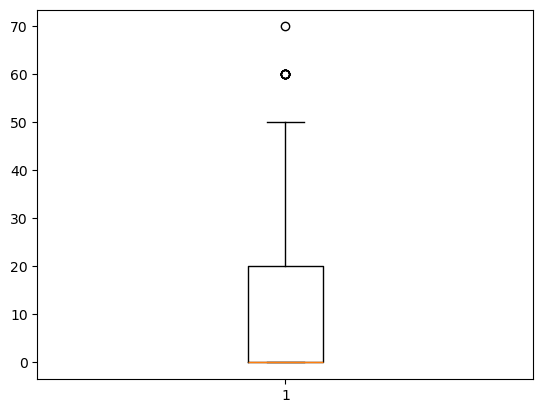

In [226]:
plt.boxplot(df.cigsPerDay)

In [227]:
# pip install feature_engine

<Axes: >

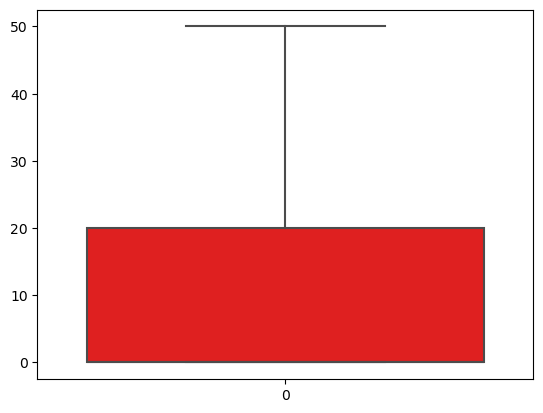

In [228]:
from feature_engine.outliers import Winsorizer
# define model with iqr method
#handle the outliers with Winsorizer
#iqr rule the boundaries
winsor_iqr=Winsorizer(capping_method='iqr', tail="both",fold=1.5,variables=["cigsPerDay"])
df["cigsPerDay"]=winsor_iqr.fit_transform(df[["cigsPerDay"]])
#inspect the max and min caps
#winsor.left_tail_caps,winsor.right_tail_caps
sns.boxplot(df.cigsPerDay,color="red")

{'whiskers': [<matplotlib.lines.Line2D at 0x25a9e410310>,
 'caps': [<matplotlib.lines.Line2D at 0x25a9e4115d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a9e403a10>],
 'medians': [<matplotlib.lines.Line2D at 0x25a9e412650>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a9e412ed0>],
 'means': []}

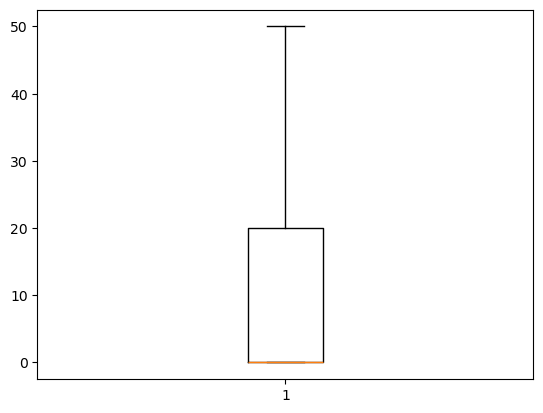

In [229]:
 plt.boxplot(df.cigsPerDay)

<Axes: >

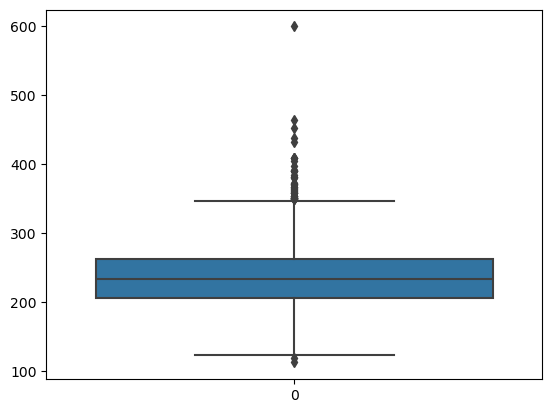

In [230]:
sns.boxplot(df.totChol )

<Axes: >

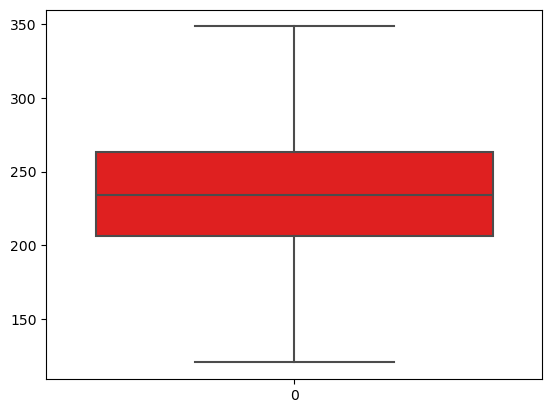

In [231]:
winsor_iqr=Winsorizer(capping_method='iqr', tail="both",fold=1.5,variables=["totChol"])
df["totChol"]=winsor_iqr.fit_transform(df[["totChol"]])

sns.boxplot(df.totChol,color="red")

<Axes: >

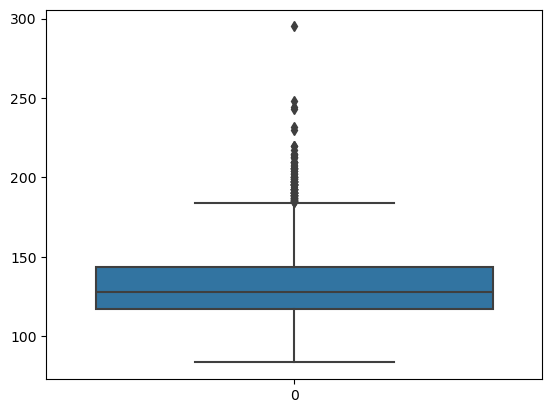

In [232]:
sns.boxplot(df.sysBP)

<Axes: >

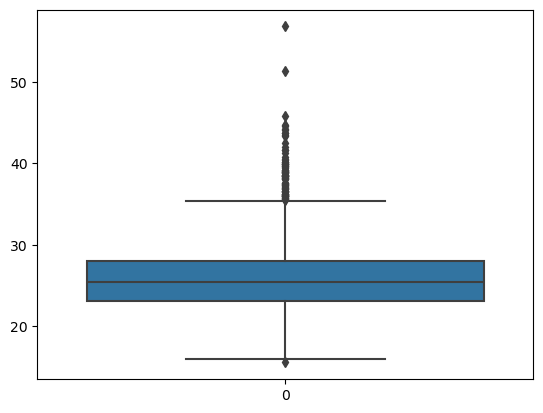

In [233]:
sns.boxplot(df.BMI)

<Axes: >

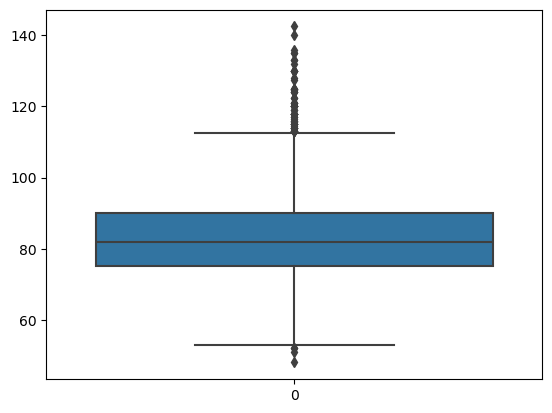

In [234]:
sns.boxplot(df.diaBP)

<Axes: >

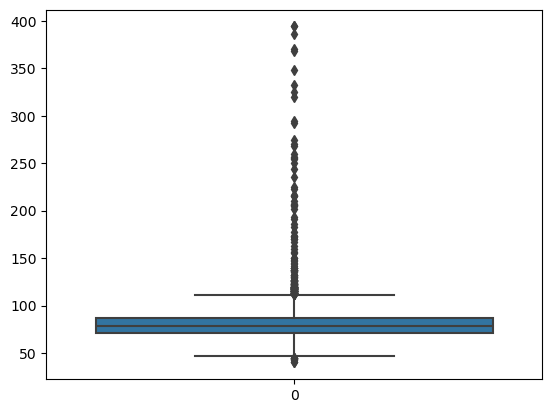

In [235]:
 sns.boxplot(df.glucose)

<Axes: >

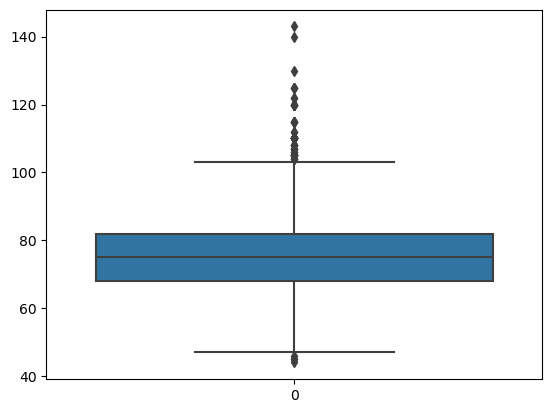

In [236]:
 sns.boxplot(df.heartRate)

<Axes: >

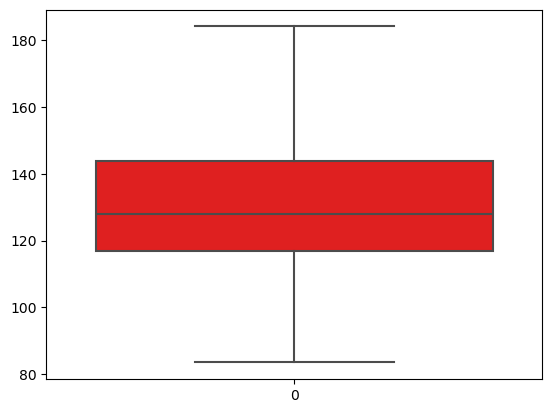

In [237]:
winsor_iqr=Winsorizer(capping_method='iqr', tail="both",fold=1.5,variables=["sysBP"])
df["sysBP"]=winsor_iqr.fit_transform(df[["sysBP"]])
sns.boxplot(df.sysBP,color="red")

<Axes: >

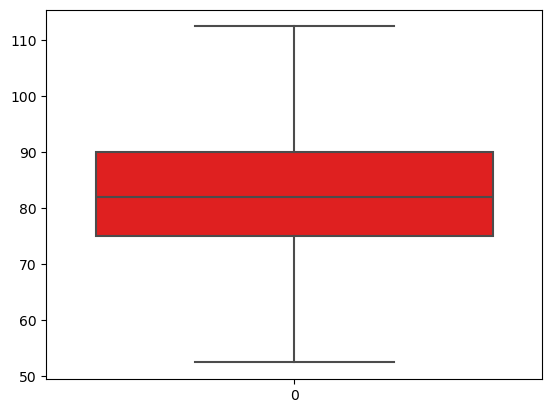

In [238]:
winsor_iqr=Winsorizer(capping_method='iqr', tail="both",fold=1.5,variables=["diaBP"])
df["diaBP"]=winsor_iqr.fit_transform(df[["diaBP"]])
sns.boxplot(df.diaBP,color="red")

<Axes: >

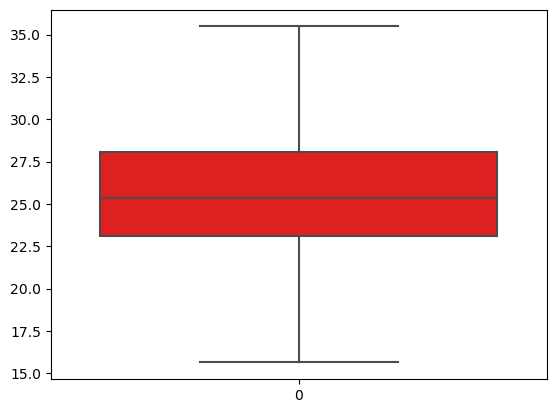

In [239]:
 winsor_iqr=Winsorizer(capping_method='iqr', tail="both",fold=1.5,variables=["BMI"])
df["BMI"]=winsor_iqr.fit_transform(df[["BMI"]])
 sns.boxplot(df.BMI,color="red")

<Axes: >

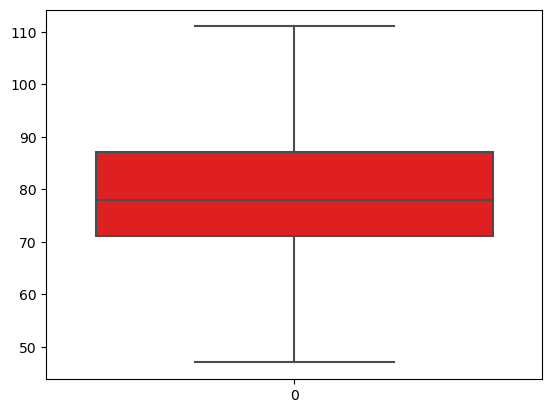

In [240]:
 winsor_iqr=Winsorizer(capping_method='iqr', tail="both",fold=1.5,variables=["glucose"])
 df["glucose"]=winsor_iqr.fit_transform(df[["glucose"]])
sns.boxplot(df.glucose,color="red")

<Axes: >

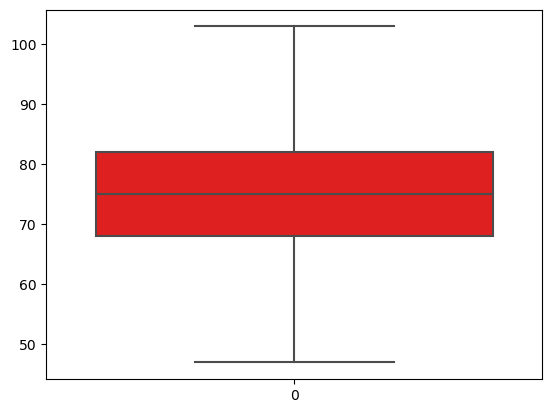

In [241]:
 winsor_iqr=Winsorizer(capping_method='iqr', tail="both",fold=1.5,variables=["heartRate"])
df["heartRate"]=winsor_iqr.fit_transform(df[["heartRate"]])
 sns.boxplot(df.heartRate,color="red")

In [242]:
df.drop("education",axis=1,inplace=True)

In [243]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,0.489065,8.995353,0.030344,0.005741,0.311646,0.027064,236.436031,131.903807,82.758885,25.698009,75.549754,79.840350,0.152269
std,0.496886,8.562029,0.499949,11.802667,0.171557,0.075561,0.463229,0.162292,42.593621,20.610688,11.462352,3.780470,11.428433,12.828124,0.359331
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.500000,83.500000,52.500000,15.643750,47.000000,47.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,348.500000,184.187500,112.500000,35.473750,103.000000,111.000000,1.000000


In [244]:
# # from sklearn.preprocessing import StandardScaler
# # scaler=StandardScaler()
# # df=scaler.fit_transform(df)
# dataset=pd.DataFrame(df)
# # res=dataset.describe()
# # # 

In [245]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [246]:
df["TenYearCHD"].value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

In [247]:
df.describe()
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


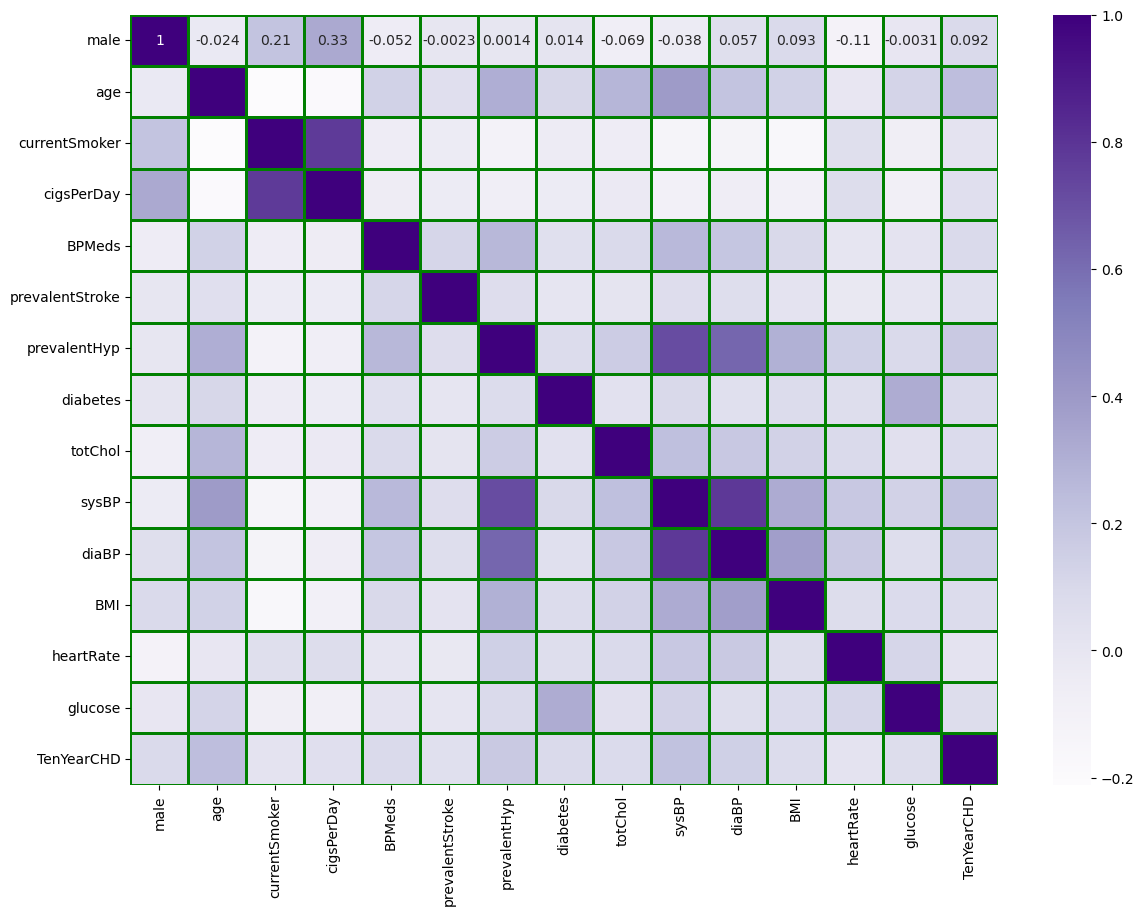

In [248]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='Purples', annot=True, linecolor='Green', linewidths=1.0)
plt.show()

In [249]:
# df.corr()

In [250]:
# sns.catplot(data=df, kind='count', x='male',hue='currentSmoker')
plt.show()

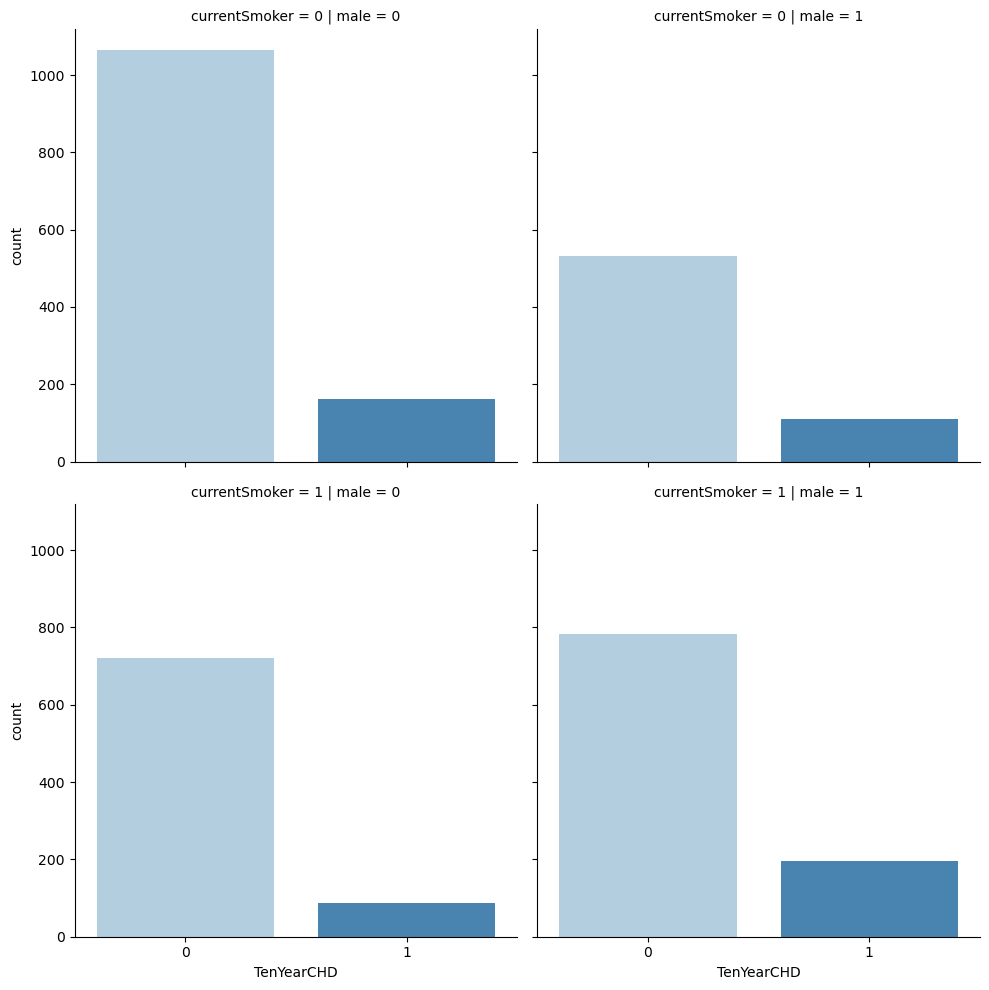

In [251]:
sns.catplot(data=df, kind='count', x='TenYearCHD', col='male',row='currentSmoker', palette='Blues')
plt.show()

In [252]:
# from sklearn.preprocessing import MinMaxScaler
# standardScaler = StandardScaler()
columns_to_scale = ['currentSmoker', 'cigsPerDay', 'totChol','sysBP','diaBP','BMI','heartRate', 'glucose']
# df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])
# df['age']=df['age']/100;

In [253]:
from sklearn.preprocessing import MinMaxScaler
minmaxscale=MinMaxScaler()
df[columns_to_scale] = minmaxscale.fit_transform(df[columns_to_scale])
df['age']=df['age']/100;

In [254]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.39,0.0,0.00,0.0,0,0,0,0.326754,0.223464,0.291667,0.571167,0.589286,0.468750,0
1,0,0.46,0.0,0.00,0.0,0,0,0,0.567982,0.372439,0.475000,0.659922,0.857143,0.453125,0
2,1,0.48,1.0,0.40,0.0,0,0,0,0.546053,0.436996,0.458333,0.488969,0.500000,0.359375,0
3,0,0.61,1.0,0.60,0.0,0,1,0,0.458333,0.660459,0.708333,0.652358,0.321429,0.875000,1
4,0,0.46,1.0,0.46,0.0,0,0,0,0.721491,0.461825,0.525000,0.376009,0.678571,0.593750,0


MACHINE LEARNING

In [176]:
x=df.iloc[:,0:14]
y=df.iloc[:,14:15]

In [177]:
x

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,0.0039,0.0,0.00,0.0,0,0,0,0.326754,0.223464,0.291667,0.571167,0.589286,0.468750
1,0,0.0046,0.0,0.00,0.0,0,0,0,0.567982,0.372439,0.475000,0.659922,0.857143,0.453125
2,1,0.0048,1.0,0.40,0.0,0,0,0,0.546053,0.436996,0.458333,0.488969,0.500000,0.359375
3,0,0.0061,1.0,0.60,0.0,0,1,0,0.458333,0.660459,0.708333,0.652358,0.321429,0.875000
4,0,0.0046,1.0,0.46,0.0,0,0,0,0.721491,0.461825,0.525000,0.376009,0.678571,0.593750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,0.0050,1.0,0.02,0.0,0,1,0,0.844298,0.948479,0.658333,0.520739,0.339286,0.609375
4234,1,0.0051,1.0,0.86,0.0,0,0,0,0.379386,0.427064,0.458333,0.205055,0.321429,0.328125
4237,0,0.0052,0.0,0.00,0.0,0,0,0,0.651316,0.496586,0.508333,0.293810,0.589286,0.937500
4238,1,0.0040,0.0,0.00,0.0,0,1,0,0.282895,0.571074,0.758333,0.502080,0.357143,0.390625


In [178]:
y

,TenYearCHD
0,0
1,0
2,0
3,1
4,0
...,...
4233,1
4234,0
4237,0
4238,0


In [179]:
x.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,0.0039,0.0,0.00,0.0,0,0,0,0.326754,0.223464,0.291667,0.571167,0.589286,0.468750
1,0,0.0046,0.0,0.00,0.0,0,0,0,0.567982,0.372439,0.475000,0.659922,0.857143,0.453125
2,1,0.0048,1.0,0.40,0.0,0,0,0,0.546053,0.436996,0.458333,0.488969,0.500000,0.359375
3,0,0.0061,1.0,0.60,0.0,0,1,0,0.458333,0.660459,0.708333,0.652358,0.321429,0.875000
4,0,0.0046,1.0,0.46,0.0,0,0,0,0.721491,0.461825,0.525000,0.376009,0.678571,0.593750


In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [181]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [182]:
lr.fit(X_train,y_train)

LogisticRegression()

In [183]:
log_y_pred=lr.predict(X_test)

In [184]:
score=lr.score(X_test,y_test)
score

0.8615664845173042

In [185]:

sc=accuracy_score(log_y_pred,y_test)
sc

0.8615664845173042

In [186]:
#new data male,age,education,currentsmoker cigsPerDay BPMeds prevalentStroke diabetes totChol  sysBP diaBP BMI heartRate glucose         
new_data1=[[1,0.45,1,0.9,1,1,1,1,2.20,0.90,0.90,0.27,0.80,0.80]]
if lr.predict(new_data1)==1:
    print("Chance of heart Attack")
else:
    print("Ur safe ")

Chance of heart Attack


In [187]:
# male,age,currentsmoker cigsPerDay BPMeds prevalentStroke diabetes totChol  sysBP diaBP BMI heartRate glucose  
new_data2=[[1,0.60,0,0,0,0,0,0,0.120,0.80,0.120,0.23,0.80,0.70]]
if lr.predict(new_data2)==1:
     print("Chance of heart Attack")
else:
    
    print("Ur safe!!!")

Ur safe!!!


##knn 

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.0039,0.0,0.00,0.0,0,0,0,0.326754,0.223464,0.291667,0.571167,0.589286,0.468750,0
1,0,0.0046,0.0,0.00,0.0,0,0,0,0.567982,0.372439,0.475000,0.659922,0.857143,0.453125,0
2,1,0.0048,1.0,0.40,0.0,0,0,0,0.546053,0.436996,0.458333,0.488969,0.500000,0.359375,0
3,0,0.0061,1.0,0.60,0.0,0,1,0,0.458333,0.660459,0.708333,0.652358,0.321429,0.875000,1
4,0,0.0046,1.0,0.46,0.0,0,0,0,0.721491,0.461825,0.525000,0.376009,0.678571,0.593750,0


In [190]:
knn_scores = []
for k in range(3,21,2):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
knn_scores

[0.8214936247723132,
 0.8378870673952641,
 0.8515482695810564,
 0.8533697632058288,
 0.855191256830601,
 0.8570127504553734,
 0.8588342440801457,
 0.8597449908925319,
 0.8597449908925319]

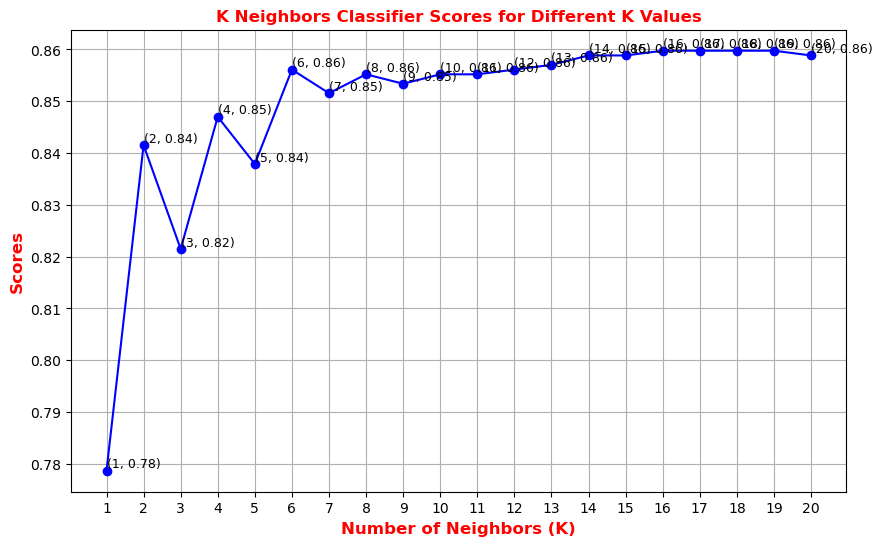

In [191]:
def calculate_knn_scores(X, y, k_range):
    knn_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        knn_scores.append(score)
    return knn_scores

def plot_elbow_method(k_range, knn_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, knn_scores, marker='o', linestyle='-', color='blue')
    for i in range(len(k_range)):
        plt.text(k_range[i], knn_scores[i], f'({k_range[i]}, {knn_scores[i]:.2f})', fontsize=9, verticalalignment='bottom')
    
    plt.xticks(k_range)
    plt.xlabel('Number of Neighbors (K)', color='red', weight='bold', fontsize=12)
    plt.ylabel('Scores', color='red', weight='bold', fontsize=12)
    plt.title('K Neighbors Classifier Scores for Different K Values', color='red', weight='bold', fontsize=12)
    plt.grid(True)
    plt.show()
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=42)

# Define the range of k values to evaluate
k_range = range(1, 21)

# Calculate KNN scores for each k value
knn_scores = calculate_knn_scores(X_train2, y_train2, k_range)

# Plot the Elbow Method graph
plot_elbow_method(k_range, knn_scores)

In [194]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [195]:
knn_y_pred=(knn.predict(X_test))

In [196]:
score=accuracy_score(knn_y_pred,y_test)

In [197]:
score

0.8515482695810564

In [198]:
if knn.predict(new_data1)==1:
    print("Chance of heart Attack")
else:
    print("Ur safe ")

Ur safe 


random forest

In [262]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=3)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [263]:

ran_y_pred = model.predict(X_test)

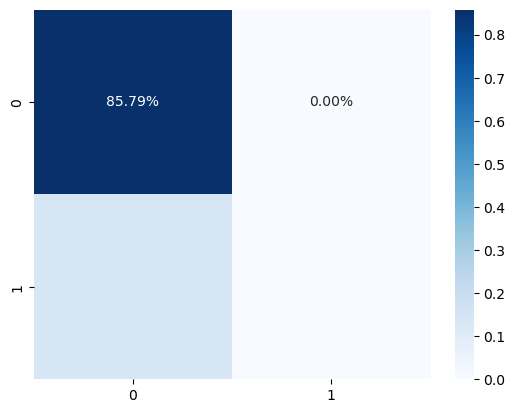

Accuracy is:  85.79234972677595


In [264]:
cm = confusion_matrix(y_test,ran_y_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,ran_y_pred)
print('Accuracy is: ',ac*100)

In [202]:
if model.predict(new_data1)==1:
    print("Chance of heart Attack")
else:
    print("Ur safe ")

Chance of heart Attack


In [203]:
res=[]
for i in range(len(y_test)):
    z=0
    o=0
    if log_y_pred[i]==1:
        o+=1
    else:
        z+=1
    if knn_y_pred[i]==1:
        o+=1
    else:
        z+=1
    if ran_y_pred[i]==1:
        o+=1
    else:
        z+=1
    if z>o:
        res.append(0)
    else:
        res.append(1)
score=accuracy_score(res,y_test)
score
    

0.860655737704918

In [258]:
def ret(point):
    if (lr.predict(point)==1 and knn.predict(point)==1):
        return 1
    if (lr.predict(point)==1 and model.predict(point)==1):
        return 1
    if (model.predict(point)==1 and knn.predict(point)==1):
        return 1
    return 0
if ret(new_data1)==1:
    print("Waring::Chance of heart Attack")
else:
    print("Ur safe ")
if ret(new_data2)==1:
    print("Waring:Chance of heart Attack")
else:
    print("Ur safe ")
# new_data1=[[1,0.45,1,0.9,1,1,1,1,2.20,0.90,0.90,0.27,0.80,0.80]]
# new_data2=[[1,0.60,0,0,0,0,0,0,0.120,0.80,0.120,0.23,0.80,0.70]]
new_data3=[[1,0.90,0,0,0,1,1,1,1.20,1.60,0.120,0.23,0.80,0.70]]
if ret(new_data3)==1:
    print("Waring:chance of heart Attack")
else:
    print("Ur safe ")

Waring::Chance of heart Attack
Ur safe 
Waring:chance of heart Attack
